In [1]:
#pip install numpy

In [4]:
pip install tensorflow


Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import tensorflow as tf
import keras as ks


Using TensorFlow backend.


In [7]:
from keras import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

#### Loading data

In [8]:
train=pd.read_csv(r"E:\MS_Studies\sem2\576\hw\hw1\kaggle\datasets\train.csv",encoding="utf8")
test=pd.read_csv(r"E:\MS_Studies\sem2\576\hw\hw1\kaggle\datasets\test.csv",encoding="utf8")

In [9]:
test.tail()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27999,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Reshaping the data to print images

In [10]:
z = np.empty(10, dtype=object) 
def imagePrint(digit):
    x=train[train.label == digit]
    y=x.head(1).values[-1,1:]
    z[digit]=y.reshape(28,28)
    
 

#### Printing Images

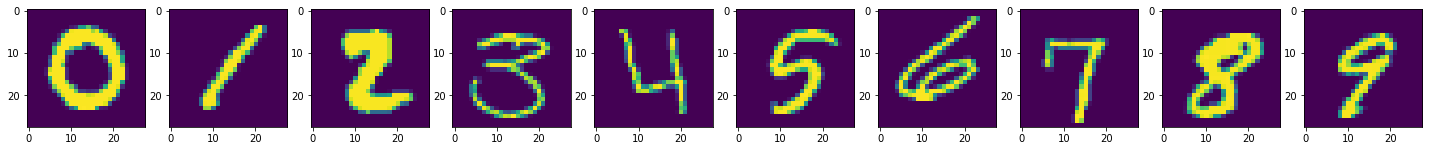

In [11]:
digits=[0,1,2,3,4,5,6,7,8,9]
for q in digits: 
   imagePrint(q)

fig = plt.figure(figsize=(25, 14))
#plotting the images for each digit
for i in range(len(z)):
  fig.add_subplot(1,10,i+1)
  plt.imshow(z[i])
 

#### Distribution of the labels

In [12]:
distribution=pd.DataFrame(train.label.value_counts())
distribution.columns = ['count']
distribution.insert(0,"label",distribution.index.values)
distribution.sort_values("label")

,label,count
0,0,4132
1,1,4684
2,2,4177
3,3,4351
4,4,4072
5,5,3795
6,6,4137
7,7,4401
8,8,4063
9,9,4188


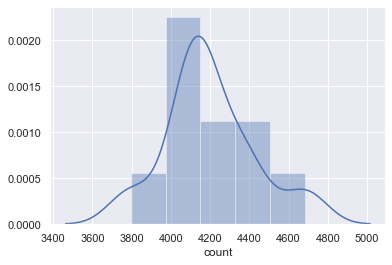

In [13]:
sns.set(color_codes=True)
sns.distplot(distribution["count"]);
#the labels are distributed almost uniformly and so we can consider as a balanced data.

#### LOGISTIC REGRESSION

In [10]:
c=[0.1,0.15,0.25,0.01,0.5,1,10] #varying costs to find the better performance. tested it on test data and the 
                                 #results are given in pdf.
for i in range(len(c)):
  model = LogisticRegression(C=c[i-1], penalty='l1', solver='saga',tol=0.1)
  model.fit(train.iloc[1:,1:], train.iloc[1:,0])
  sparsity = np.mean(model.coef_ == 0) * 100
  test_pred = model.predict(test.iloc[1:,:])
  pd.DataFrame(test_pred).to_csv('predicted_5_l1_'+str(c[i])+'.csv', index=False) 

C:\Users\sruth\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\sruth\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\sruth\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\sruth\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\sruth\Anaconda3\lib\site-pa

In [14]:
pd.DataFrame(test_pred).describe()

,0
count,27999.000000
mean,4.435623
std,2.911288
min,0.000000
25%,2.000000
50%,4.000000
75%,7.000000
max,9.000000


#### Neural Net Classifier

In [14]:
# save input image dimensions
img_rows, img_cols = 28, 28
x_train=train.iloc[:,1:].copy()
y_train=train.iloc[:,0].copy().values
x_test=test.iloc[1:,:].copy()
x_train = x_train.values.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.values.reshape(x_test.shape[0], img_rows, img_cols, 1)



In [15]:
#splitting the train data into train and validation
import random
random.seed(0)
split_size = int(x_train.shape[0]*0.7)
train_x,val_x = x_train[:split_size],x_train[split_size:]
train_y,val_y = y_train[:split_size],y_train[split_size:]

train_x = train_x.reshape (train_x.shape[0], img_rows, img_cols,1)
val_x = val_x.reshape (val_x.shape[0], img_rows, img_cols,1)

In [16]:
x_train.shape

(42000, 28, 28, 1)

In [17]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2))) 
model.add(Flatten())
model.add(Dense(200,activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(50,activation = 'relu'))
model.add(Dropout(0.20))
model.add(Dense(10,activation='softmax'))

In [18]:
model.compile(loss='sparse_categorical_crossentropy',
      optimizer='adam',
      metrics=['accuracy'])

In [19]:
model.fit(train_x, train_y,
          epochs=10,
         verbose=1, validation_data = (val_x,val_y))
#y_test=pd.DataFrame(model.predict_classes(x_test))

Train on 29399 samples, validate on 12601 samples
Epoch 1/10
29399/29399 [==============================] - 29s 998us/step - loss: 2.0779 - accuracy: 0.5819 - val_loss: 0.4951 - val_accuracy: 0.8752
Epoch 2/10
29399/29399 [==============================] - 29s 984us/step - loss: 0.6062 - accuracy: 0.8330 - val_loss: 0.2703 - val_accuracy: 0.9242
Epoch 3/10
29399/29399 [==============================] - 29s 993us/step - loss: 0.3771 - accuracy: 0.8948 - val_loss: 0.1946 - val_accuracy: 0.9468
Epoch 4/10
29399/29399 [==============================] - 28s 968us/step - loss: 0.2811 - accuracy: 0.9241 - val_loss: 0.1679 - val_accuracy: 0.9541
Epoch 5/10
29399/29399 [==============================] - 28s 955us/step - loss: 0.2493 - accuracy: 0.9314 - val_loss: 0.1797 - val_accuracy: 0.9548
Epoch 6/10
29399/29399 [==============================] - 32s 1ms/step - loss: 0.2172 - accuracy: 0.9414 - val_loss: 0.1620 - val_accuracy: 0.9595
Epoch 7/10
29399/29399 [==============================] - 

In [20]:
y_test=pd.DataFrame(model.predict_classes(x_test))

In [21]:
y_test.to_csv('output_cnn.csv', index=False)

In [22]:
##predicting the values of the validating data to get confusion matrix

In [23]:
predictions = model.predict_classes(val_x)

#### Confusion Matrix

In [24]:
import sklearn.metrics as metrics
from sklearn.metrics import classification_report
cm = metrics.confusion_matrix(val_y, predictions)
#cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

In [25]:
cm

array([[1247,    0,    1,    0,    1,    0,    3,    1,   10,    0],
       [   0, 1396,    4,    0,    1,    0,    3,    1,    5,    0],
       [   3,    0, 1193,    9,    3,    0,    1,    6,   10,    1],
       [   0,    5,   13, 1260,    1,   18,    0,    4,   14,    2],
       [   2,    3,    5,    0, 1155,    1,    3,    1,    6,    8],
       [   3,    1,    0,    7,    1, 1107,    6,    0,    8,    2],
       [  16,    2,    1,    0,    3,    6, 1194,    0,    5,    0],
       [   3,    1,   10,    1,    1,    0,    0, 1310,    2,    4],
       [   4,   12,    7,    6,    4,   13,    6,    0, 1179,    4],
       [   3,    1,    0,    7,   34,    9,    0,   24,   16, 1178]],
      dtype=int64)

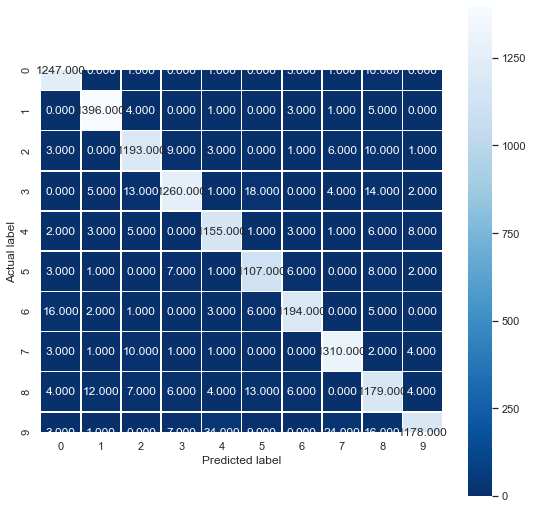

In [26]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

In [27]:
##classification report
report=pd.DataFrame(classification_report(val_y,predictions,output_dict=True)).transpose()
report.insert(0,"label",report.index.values)

In [28]:
report

,label,precision,recall,f1-score,support
0,0,0.973458,0.987332,0.980346,1263.000000
1,1,0.982407,0.990071,0.986224,1410.000000
2,2,0.966775,0.973083,0.969919,1226.000000
3,3,0.976744,0.956720,0.966628,1317.000000
4,4,0.959302,0.975507,0.967337,1184.000000
5,5,0.959272,0.975330,0.967235,1135.000000
6,6,0.981908,0.973105,0.977487,1227.000000
7,7,0.972532,0.983483,0.977977,1332.000000
8,8,0.939442,0.954656,0.946988,1235.000000
9,9,0.982485,0.926101,0.953460,1272.000000


In [29]:
# label with lowest precision
min_index=report[report.precision == report.precision.min()]
min_index
## Label 5 has the lowest precision

,label,precision,recall,f1-score,support
8,8,0.939442,0.954656,0.946988,1235.0


## Displaying misclassified images

In [30]:
index = 0
misclassifiedIndexes = []
for label, predict in zip(val_y, predictions):
    if label != predict: 
        misclassifiedIndexes.append(index)
    index +=1

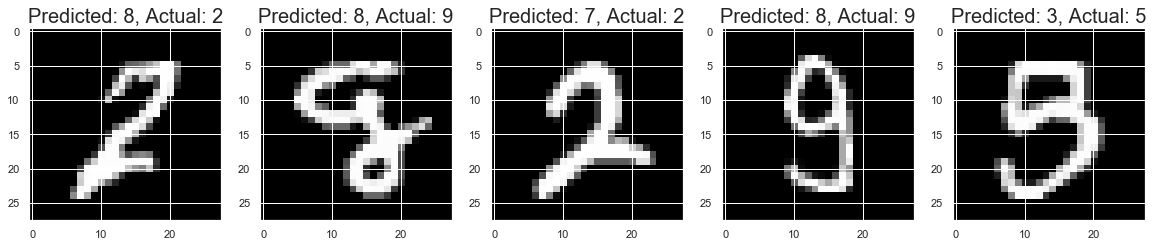

In [31]:
# printing misclassified images
plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:5]):
    plt.subplot(1, 5, plotIndex + 1)
    plt.imshow(np.reshape(val_x[badIndex], (28,28)), cmap=plt.cm.gray)
    plt.title('Predicted: {}, Actual: {}'.format(predictions[badIndex], val_y[badIndex]), fontsize = 20)